In [ ]:
# day37_Advanced Authentication and POST,PUT,DELETE Requests
# Pixela API attract your habit.
# HTTP Request
# get: get pieces of data from API provider
# there other types of comments: get, post, put, delete
# ex) requests.get(), requests.post(), requests.put(), requests.delete()
# POST: we give external system our data. not so interested in the response external system back
# ex) post your data to google sheet
# PUT: undate your data in the external system

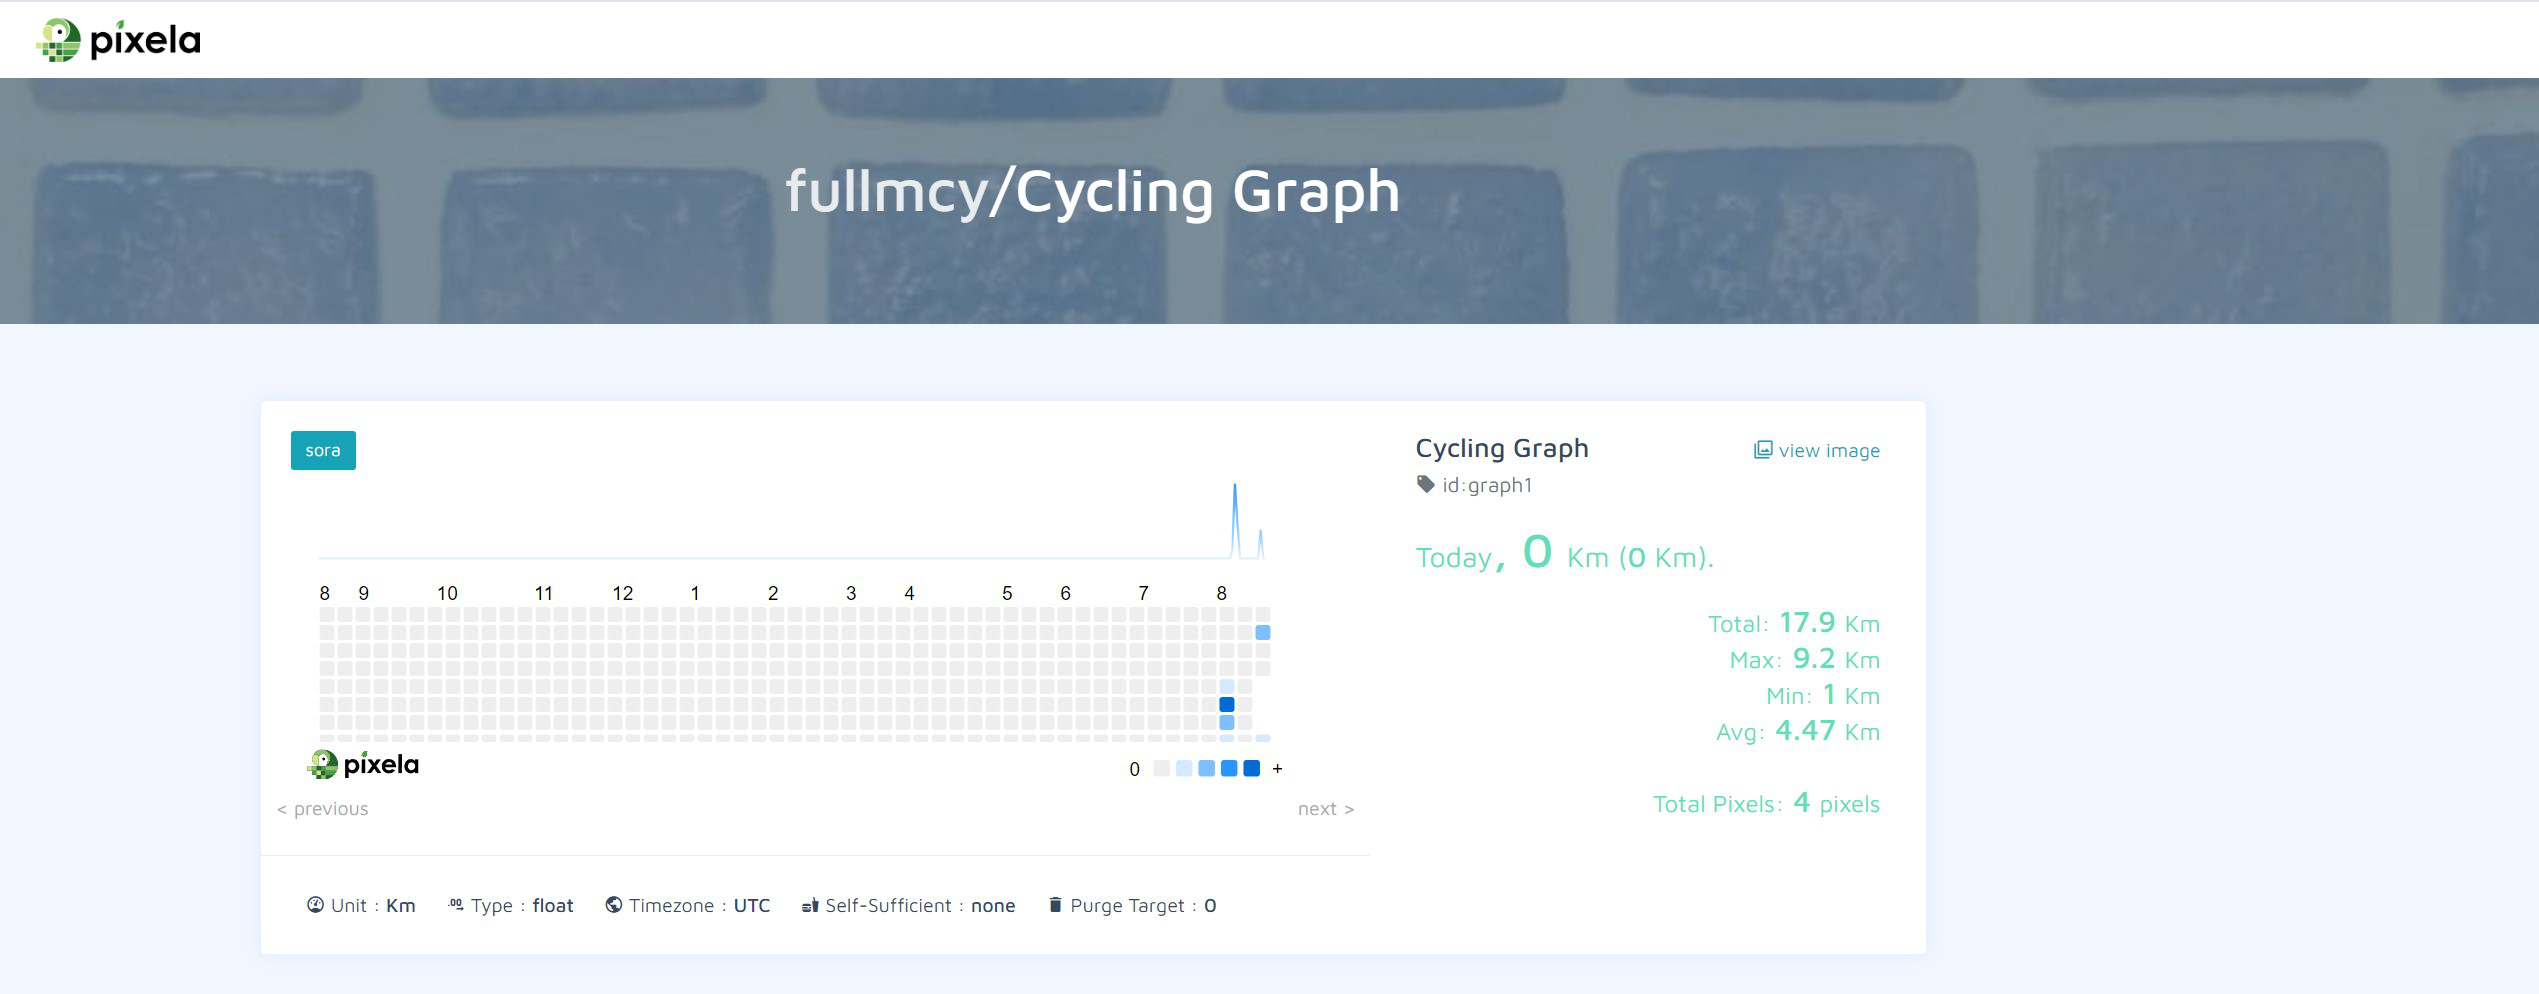

In [3]:
# https://pixe.la/v1/users/fullmcy/graphs/graph1.html
from PIL import Image
from IPython.display import display
img = Image.open('pixela.jpg')
display(img)

In [ ]:
# https://pixe.la/
# https://docs.pixe.la/entry/post-user
# https://pixe.la/v1/users/fullmcy/graphs/graph1.html
import requests
from datetime import datetime

# STEP1. Create your user account
USERNAME = "fullmcy"
TOKEN = "#####"

pixela_endpoint = "https://pixe.la/v1/users"

user_params = {
    "token": TOKEN,  # like API key
    "username": USERNAME,
    "agreeTermsOfService": "yes",
    "notMinor": "yes"
}

# response = requests.post(url=pixela_endpoint, json=user_params)
# print(response.text)


# STEP2. Create a graph definition
graph_endpoint = f"https://pixe.la/v1/users/{USERNAME}/graphs"

graph_config = {
    "id": "graph1",
    "name": "Cycling Graph",
    "unit": "Km",
    "type": "float",
    "color": "sora"
}

headers = {
    "X-USER-TOKEN": TOKEN
}
# Headers: a part that contains relevant information
# Body: message part
# s in 'https' stands for security
# write API key on the page could make privacy or security issue
# to solve this problem, some API presenters use Authentication in the Header

# response = requests.post(url=graph_endpoint, json=graph_config, headers=headers)
# print(response.text)


# STEP3. Get the graph!
# https://pixe.la/v1/users/fullmcy/graphs/graph1.html


# STEP4. Post value to the graph
post_value_endpoint = f"{graph_endpoint}/graph1"

# Q. How can we get the date automatically?
today = datetime(year=2024, month=8, day=12)
# today = datetime.now()
# today valuable format is not what I want. In this case, we could use strftime() Method
# strftime() allows to pass string and change the data any format we need
# https://www.w3schools.com/python/python_datetime.asp
print(today.strftime("%Y%m%d"))

post_value_params = {
    "date": today.strftime("%Y%m%d"),  # "20240813"
    "quantity": "3.5",  # input("How many km did you run?")  # 'input the value' is also possible
}

response = requests.post(url=post_value_endpoint, json=post_value_params, headers=headers)
print(response.text)

In [ ]:
# test.py
# Q. is it possible to call put() function in for loop?
# A. Sure!

import requests
from datetime import datetime

USERNAME = "fullmcy"
TOKEN = "#####"

post_value_endpoint = f"https://pixe.la/v1/users/fullmcy/graphs/graph1"
headers = {
    "X-USER-TOKEN": TOKEN
}

result_dic = {
    "date":["20240801", "20240802", "20240803"],
    "km":["1.0", "9.2", "4.2"]
}

for i in range(3):
    post_value_params = {
        "date": result_dic["date"][i],  # "20240813"
        "quantity": result_dic["km"][i]
    }

    response = requests.post(url=post_value_endpoint, json=post_value_params, headers=headers)
    print(response.text)

In [ ]:
# update.py
# Update the value to use PUT
import requests

USERNAME = "fullmcy"
TOKEN = "#####"

update_endpoint = f"https://pixe.la/v1/users/{USERNAME}/graphs/graph1/20240813"

headers = {
    "X-USER-TOKEN": TOKEN
}

update_params = {
    "quantity": "8.9"  # changed from 3.5 to 8.9
}

response = requests.put(url=update_endpoint, json=update_params, headers=headers)
print(response.text)

In [ ]:
# delete.py
# Delete the value with Delete
import requests

USERNAME = "fullmcy"
TOKEN = "#####"

delete_endpoint = f"https://pixe.la/v1/users/{USERNAME}/graphs/graph1/20240813"

headers = {
    "X-USER-TOKEN": TOKEN
}

response = requests.delete(url=delete_endpoint, headers=headers)
print(response.text)